In [1]:
import numpy as np
from matplotlib import pyplot as plt   
import matplotlib.pyplot as plt
import pandas as pd
import math
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
import cv2
plt.style.use(astropy_mpl_style)
#plt.style.use("default")
#import sys
#sys.path.append('/Users/shaivi/mypy/')
import tvg
from matplotlib import pyplot, image, transforms
from scipy import ndimage
import skimage

from scipy import ndimage
import matplotlib.pyplot as plt

In [2]:
conti = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_conti_index.fits')
magincl = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_magincl_index.fits')
magfield = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_magfield_index.fits')
dopp = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_dopp1_index.fits')

num_scans = 59
dim = conti[1].data.shape
data_conti = np.zeros((dim[0], dim[1], num_scans))
data_magincl = np.zeros((dim[0], dim[1], num_scans))
data_Bz = np.zeros((dim[0], dim[1], num_scans))
#data_dopp = np.zeros((dim[0], dim[1], num_scans))

for i in range(num_scans):
    data_conti_temp = conti[i+1].data
    #data_conti_2=(data_conti_temp - data_conti_temp.min())*(255.0/(data_conti_temp - data_conti_temp.min()).max())
    #data_conti[:,:,i] = data_conti_2
    data_conti[:,:,i] = data_conti_temp
    np.save('/Users/shaivi/Downloads/test_conti.npy', data_conti)
   
    data_magincl_temp = magincl[i+1].data
    #data_magincl_2=(data_magincl_temp - data_magincl_temp.min())*(255.0/(data_magincl_temp - data_magincl_temp.min()).max())
    #data_magincl[:,:,i] = data_magincl_2
    data_magincl[:,:,i] = data_magincl_temp
    np.save('/Users/shaivi/Downloads/test_magincl.npy', data_magincl)

    data_magfield_temp = magfield[i+1].data
    Bz_temp =  data_magfield_temp*(np.cos(np.array(np.deg2rad(data_magincl_temp))))
    #data_Bz_2=(Bz_temp - Bz_temp.min())*(255.0/(Bz_temp - Bz_temp.min()).max())
    #data_Bz[:,:,i] = data_Bz_2
    data_Bz[:,:,i] = Bz_temp
    
    np.save('/Users/shaivi/Downloads/test_Bz.npy', data_Bz)
    
    #data_dopp_temp = dopp[i+1].data
    #data_dopp_2=(data_dopp_temp - data_dopp_temp.min())*(255.0/(data_dopp_temp - data_dopp_temp.min()).max())
    #data_dopp[:,:,i] = data_dopp_2
    #np.save('/Users/shaivi/Downloads/test_dopp1.npy', data_dopp)
    
dim = data_Bz.shape
alltogether = np.zeros((dim[0], dim[1]*3, dim[2]))
j = 0; alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_conti
j = 1 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_magincl
j = 2 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_Bz
#j = 3 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_dopp


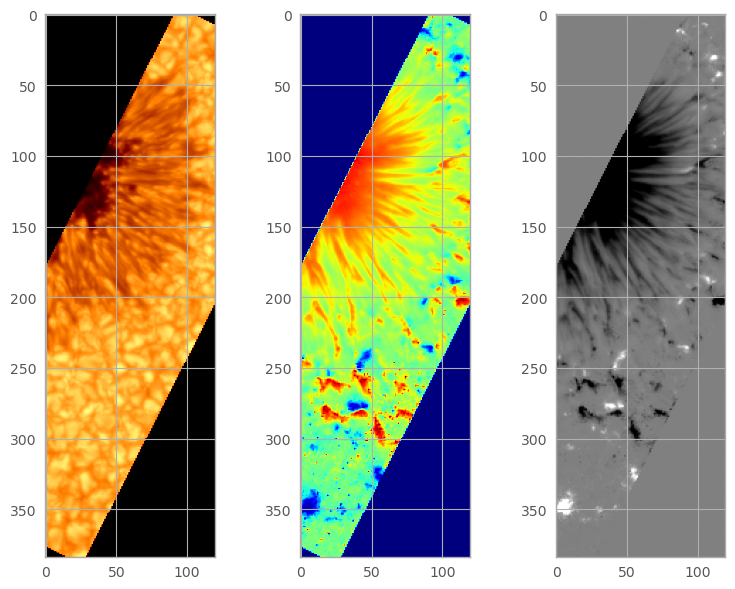

In [3]:
#the filament touching the center of the spot, right under the 100 mark!


dc_rot = ndimage.rotate(data_conti, -27, reshape=False)
mi_rot = ndimage.rotate(data_magincl, -27, reshape=False)
bz_rot = ndimage.rotate(data_Bz, -27, reshape=False)

fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[:,:,44], cmap='afmhot', vmin=3e3, vmax=20e3)
#ax[0].set_axis_off()
ax[1].imshow(mi_rot[:,:,44], cmap='jet',  vmin=0, vmax=180)
#ax[1].set_axis_off()
ax[2].imshow(bz_rot[:,:,44], cmap='gray', vmin=-1250, vmax=1250)
#ax[2].set_axis_off()

fig.set_layout_engine('tight')
plt.show()

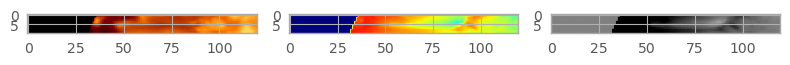

In [29]:
dc_rot = ndimage.rotate(data_conti, -27, reshape=False)
mi_rot = ndimage.rotate(data_magincl, -27, reshape=False)
bz_rot = ndimage.rotate(data_Bz, -27, reshape=False)

fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[107:117,:,42], cmap='afmhot', vmin=3e3, vmax=20e3)
#ax[0].set_axis_off()
ax[1].imshow(mi_rot[107:117,:,42], cmap='jet',  vmin=0, vmax=180)
#ax[1].set_axis_off()
ax[2].imshow(bz_rot[107:117,:,42], cmap='gray', vmin=-1250, vmax=1250)
#ax[2].set_axis_off()

fig.set_layout_engine('tight')
plt.show()

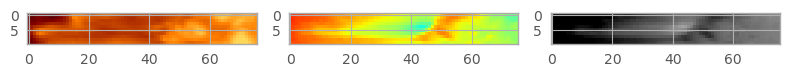

In [48]:
a = 107
b = 117
fig, ax = plt.subplots(1,3)
ax[0].imshow(dc_rot[a:b,44:,42], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[1].imshow(mi_rot[a:b,44:,42], cmap='jet',  vmin=0, vmax=180)
ax[2].imshow(bz_rot[a:b,44:,42], cmap='gray', vmin=-1250, vmax=1250)
#for j in range(3): ax[j].grid(False)
fig.set_layout_engine('tight')
test = plt.show()

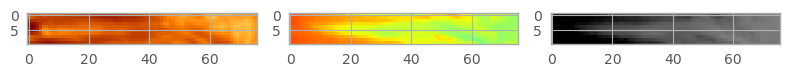

In [47]:
#here inclination and Bz needed manual adjustment to match the filament.

a = 111
b = 121
fig, ax = plt.subplots(1,3)
ax[0].imshow(dc_rot[a:b,44:,43], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[1].imshow(mi_rot[113:123,44:,43], cmap='jet',  vmin=0, vmax=180)
ax[2].imshow(bz_rot[113:123,44:,43], cmap='gray', vmin=-1250, vmax=1250)
#for j in range(3): ax[j].grid(False)
fig.set_layout_engine('tight')
test = plt.show()

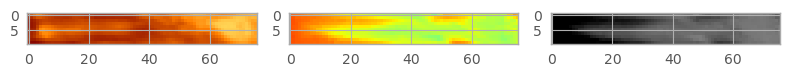

In [68]:
#Skipped image 44 because the filament was not clear, and the plot would not have looked as close to the others.

a = 109
b = 119
fig, ax = plt.subplots(1,3)
ax[0].imshow(dc_rot[a:b,44:,45], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[1].imshow(mi_rot[110:120,44:,45], cmap='jet',  vmin=0, vmax=180)
ax[2].imshow(bz_rot[110:120,44:,45], cmap='gray', vmin=-1250, vmax=1250)
#for j in range(3): ax[j].grid(False)
fig.set_layout_engine('tight')
test = plt.show()

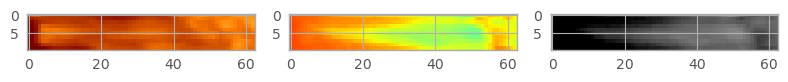

In [81]:
a = 108
b = 118
fig, ax = plt.subplots(1,3)
ax[0].imshow(dc_rot[a:b,42:105,46], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[1].imshow(mi_rot[109:119,42:105,46], cmap='jet',  vmin=0, vmax=180)
ax[2].imshow(bz_rot[109:119,42:105,46], cmap='gray', vmin=-1250, vmax=1250)
#for j in range(3): ax[j].grid(False)
fig.set_layout_engine('tight')
test = plt.show()

In [96]:
#continuum intensity
dc_rot[108:118,42:105,46][5][0:63]

array([ 6538.23015762,  6802.51907591,  7816.05751984,  9555.60527076,
       10688.4861489 , 11104.06845447, 11156.44536208, 11198.16572467,
       11142.92518785, 11076.69189842, 11021.5843762 , 10886.82474835,
       10689.02447883, 10460.29591515, 10243.20184079,  9952.44154257,
        9897.95198175,  9807.32108227,  9792.71257124,  9657.14499379,
        9646.57287799,  9700.56406109,  9858.70847212,  9984.03279812,
        9974.05007822,  9968.001207  , 10124.1884334 , 10252.65623034,
       10406.63545588, 10549.78876124, 10697.45575056, 10835.33607857,
       10957.78128307, 11026.43936755, 10970.37838213, 10968.56330902,
       10780.20796056, 10650.11263505, 10483.35728938, 10279.1100499 ,
       10125.19685876,  9960.61532437,  9830.16218463,  9785.05924937,
        9835.80336758, 10012.03670532, 10249.48157767, 10586.31313365,
       10889.19620016, 11090.34687726, 11066.02720795, 11152.43862632,
       10849.76510687, 10475.16695111, 10716.25872186, 10949.3895919 ,
      

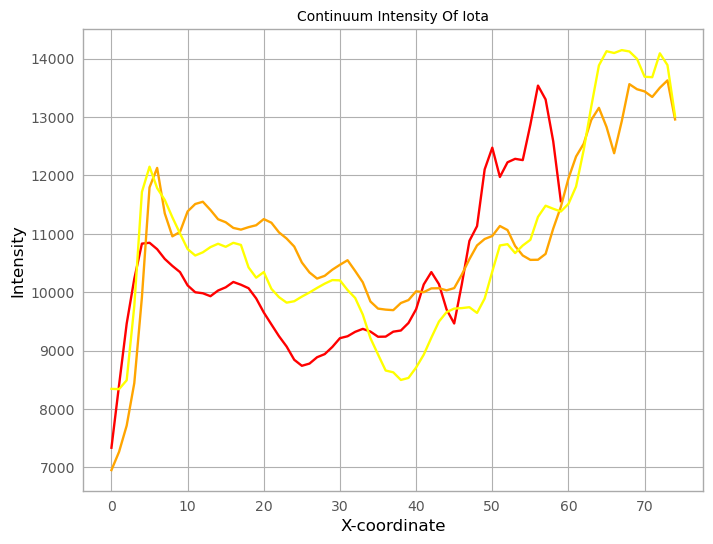

In [103]:
#vertical index [5]
dc_y0 = np.array([ 7337.00800554,  8408.78237451,  9461.66265733, 10230.35250092,
       10832.86718131, 10847.64697766, 10737.77433378, 10571.04719776,
       10451.09700447, 10345.26570469, 10117.53956841, 10000.01881674,
        9982.79691466,  9932.47794833, 10029.68273387, 10084.55617266,
       10176.3916458 , 10128.81731435, 10069.24597074,  9894.849001  ,
        9653.6903993 ,  9449.42477715,  9247.07480482,  9070.11858646,
        8843.41800205,  8740.69432443,  8778.22213544,  8887.3311362 ,
        8940.47399832,  9063.07168825,  9213.96794547,  9246.30567582,
        9322.18939204,  9372.72459227,  9326.89967227,  9237.81541659,
        9240.20187455,  9324.95793561,  9344.95716941,  9474.23174529,
        9709.07573642, 10133.42193022, 10345.3179075 , 10138.87619955,
        9705.42032831,  9464.99182222, 10136.834411  , 10880.43073075,
       11132.3815717 , 12104.38437551, 12476.22435507, 11974.42314997,
       12225.73373786, 12285.23843298, 12263.40398015, 12869.36297974,
       13539.56129935, 13302.58941779, 12586.25818642, 11560.28542212])
dc_x0 = range(0,60)

#vertical index [5]
dc_y1 = np.array([ 6953.82285302,  7267.00381817,  7716.11268444,  8444.68743042,
        9913.38320996, 11795.59277448, 12129.73619298, 11350.77288803,
       10958.10715181, 11032.53231576, 11384.33001391, 11511.53182981,
       11550.21121553, 11409.25437744, 11250.41260858, 11199.15625604,
       11102.15057257, 11072.79209613, 11114.81459762, 11147.78447239,
       11253.19564011, 11190.86841309, 11025.10060493, 10919.93756362,
       10782.21964767, 10510.00615277, 10339.2211373 , 10234.25763795,
       10281.55290438, 10386.28614596, 10470.51885618, 10548.80726522,
       10363.88915174, 10170.0653188 ,  9842.00268978,  9720.03270322,
        9702.59193493,  9693.37559889,  9815.8518954 ,  9866.23087657,
       10016.2287315 , 10001.72214337, 10066.27682983, 10069.06629493,
       10032.88394815, 10070.73110541, 10302.45476158, 10567.70619397,
       10802.34341323, 10912.01998588, 10963.94818056, 11134.70868217,
       11065.12045334, 10791.92471538, 10629.87999628, 10554.65257652,
       10556.73403676, 10657.21764678, 11089.59465035, 11461.91325215,
       11949.57869746, 12324.72071105, 12543.74091991, 12952.59373965,
       13158.30851317, 12831.03809567, 12380.85919467, 12930.34301485,
       13564.26849063, 13477.48443297, 13440.15191255, 13345.03966327,
       13502.77912311, 13628.70914546, 12960.0157089 ])
dc_x1 = range(0,75)

#vertical index [5]
dc_y2 = np.array([ 8345.52281962,  8340.68843356,  8492.52488581,  9764.29434211,
       11717.11745296, 12150.47833192, 11783.34407491, 11581.69333452,
       11283.59706494, 11007.07504836, 10739.836292  , 10629.47722034,
       10684.17657072, 10773.52692108, 10830.61119108, 10778.30196023,
       10846.81988418, 10810.57766686, 10426.09073239, 10249.54106585,
       10345.62559384, 10058.47239711,  9915.60819847,  9822.01906045,
        9846.46198015,  9925.5510811 ,  9995.99015632, 10074.2121063 ,
       10147.46468777, 10208.59671396, 10203.72875478, 10037.40791094,
        9901.86943006,  9617.70303424,  9214.48934711,  8934.37396856,
        8659.61429103,  8628.56695843,  8497.85199478,  8532.73251739,
        8711.06937888,  8930.76179137,  9222.37296816,  9498.43278085,
        9660.15322818,  9720.26999204,  9728.56705899,  9743.88833863,
        9646.25352661,  9892.50335467, 10354.60620526, 10801.20529057,
       10823.28791107, 10671.15420813, 10800.6059535 , 10898.27221629,
       11290.94614134, 11482.32025157, 11429.98707403, 11383.37413135,
       11513.16804913, 11810.75849014, 12436.33048879, 13182.78388314,
       13885.35039384, 14128.44282116, 14097.72059502, 14147.31831594,
       14124.26934948, 13998.50309122, 13690.90861447, 13683.53037647,
       14092.4321257 , 13890.9516736 , 13015.29322267])
dc_x2 = range(0,75)

#vertical index [5]
dc_y3 = np.array([ 6538.23015762,  6802.51907591,  7816.05751984,  9555.60527076,
       10688.4861489 , 11104.06845447, 11156.44536208, 11198.16572467,
       11142.92518785, 11076.69189842, 11021.5843762 , 10886.82474835,
       10689.02447883, 10460.29591515, 10243.20184079,  9952.44154257,
        9897.95198175,  9807.32108227,  9792.71257124,  9657.14499379,
        9646.57287799,  9700.56406109,  9858.70847212,  9984.03279812,
        9974.05007822,  9968.001207  , 10124.1884334 , 10252.65623034,
       10406.63545588, 10549.78876124, 10697.45575056, 10835.33607857,
       10957.78128307, 11026.43936755, 10970.37838213, 10968.56330902,
       10780.20796056, 10650.11263505, 10483.35728938, 10279.1100499 ,
       10125.19685876,  9960.61532437,  9830.16218463,  9785.05924937,
        9835.80336758, 10012.03670532, 10249.48157767, 10586.31313365,
       10889.19620016, 11090.34687726, 11066.02720795, 11152.43862632,
       10849.76510687, 10475.16695111, 10716.25872186, 10949.3895919 ,
       10996.2278367 , 11218.42582417, 11133.71298968, 10832.2878493 ,
       10833.09236026, 10676.93848211, 10999.5948489 ])
dc_x3 = range(0,63)

plt.title("Continuum Intensity Of Iota")
plt.xlabel("X-coordinate")
plt.ylabel("Intensity")
plt.plot(dc_x0,dc_y0, color="red")
plt.plot(dc_x1,dc_y1, color="orange")
plt.plot(dc_x2,dc_y2, color="yellow")
#plt.plot(dc_x3,dc_y3, color="pink")

plt.show()


##THIS SHOULD BE CROPPED AROUND 45.

In [101]:
##magnetic inclinaton
mi_rot[110:120,44:,45][5][0:60]

array([149.39021273, 147.5586541 , 145.59501091, 143.28377144,
       141.00196967, 139.36978486, 137.11546017, 134.40594172,
       132.40854107, 127.4619889 , 126.20107672, 123.32588288,
       121.31544677, 119.20375332, 116.86237632, 116.66155202,
       115.56442943, 115.27789336, 115.10150038, 112.31973911,
       111.41060209, 111.09686251, 111.42869494, 110.27243873,
       110.33891102, 109.76757483, 108.30997522, 107.17009139,
       105.32597604, 104.42872744, 103.31204753, 102.53355208,
       101.57130508, 100.43862249, 101.22361714,  99.32429482,
        98.97364038, 101.03125465, 100.02044241, 101.54554828,
       101.95204377, 101.90157705, 102.26852898, 103.21649239,
       104.06822421, 104.21223547, 104.15609589, 104.0974291 ,
       103.03935966, 103.24944068, 102.22465954, 102.40420257,
       102.48139543, 102.48445832, 102.99149376, 103.79453414,
       102.28140809, 102.50829188, 105.19253072, 109.66949192])

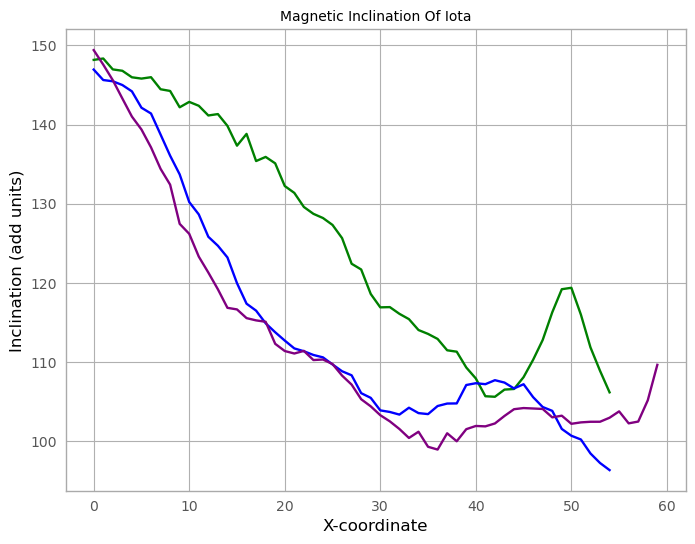

In [104]:
#vertical index [5]
mi_y0 = np.array([148.1557946 , 148.3305615 , 146.95485276, 146.78247182,
       145.96009758, 145.79584445, 145.97011936, 144.44967626,
       144.23646543, 142.17340917, 142.85486084, 142.36396119,
       141.14061003, 141.31684874, 139.8274726 , 137.32887677,
       138.81568521, 135.38832692, 135.90927128, 135.09866093,
       132.23665014, 131.36941033, 129.59182851, 128.725041  ,
       128.19717885, 127.32409549, 125.66148916, 122.42419659,
       121.70191445, 118.61134453, 116.92307604, 116.95308442,
       116.10786951, 115.43523072, 114.05974082, 113.57028993,
       112.93661749, 111.50298538, 111.32735034, 109.33026702,
       107.94828752, 105.70531049, 105.63608812, 106.54270811,
       106.61857289, 108.11508247, 110.30955282, 112.8031685 ,
       116.29535057, 119.2118719 , 119.39158225, 115.99935129,
       111.87249413, 108.92040065, 106.19528123])
mi_x0 = range(0,55)

#vertical index [5]
mi_y1 = np.array([146.93280487, 145.61355608, 145.45576083, 144.98402247,
       144.1847718 , 142.11873994, 141.38827649, 138.73501684,
       136.06456478, 133.70521284, 130.21276854, 128.65225156,
       125.82972877, 124.69818116, 123.22182913, 119.97625383,
       117.38440663, 116.50600521, 114.90977187, 113.77778247,
       112.7304754 , 111.74093961, 111.38425164, 110.91383618,
       110.61021031, 109.71458157, 108.85704898, 108.34663243,
       106.09307387, 105.50033754, 103.91983412, 103.71930592,
       103.38694762, 104.25454059, 103.57402621, 103.44908368,
       104.46924857, 104.78028223, 104.79682007, 107.12168625,
       107.34645494, 107.22564403, 107.72941436, 107.42868593,
       106.68699816, 107.21990011, 105.58507046, 104.3446223 ,
       103.86002773, 101.57557102, 100.71797841, 100.24394505,
        98.48426888,  97.28033061,  96.38016069])
mi_x1 = range(0,55)

#vertical index [6]
mi_y2 = np.array([149.39021273, 147.5586541 , 145.59501091, 143.28377144,
       141.00196967, 139.36978486, 137.11546017, 134.40594172,
       132.40854107, 127.4619889 , 126.20107672, 123.32588288,
       121.31544677, 119.20375332, 116.86237632, 116.66155202,
       115.56442943, 115.27789336, 115.10150038, 112.31973911,
       111.41060209, 111.09686251, 111.42869494, 110.27243873,
       110.33891102, 109.76757483, 108.30997522, 107.17009139,
       105.32597604, 104.42872744, 103.31204753, 102.53355208,
       101.57130508, 100.43862249, 101.22361714,  99.32429482,
        98.97364038, 101.03125465, 100.02044241, 101.54554828,
       101.95204377, 101.90157705, 102.26852898, 103.21649239,
       104.06822421, 104.21223547, 104.15609589, 104.0974291 ,
       103.03935966, 103.24944068, 102.22465954, 102.40420257,
       102.48139543, 102.48445832, 102.99149376, 103.79453414,
       102.28140809, 102.50829188, 105.19253072, 109.66949192])
mi_x2 = range(0,60)

#vertical index [5]
#mi_y3 = np.array([119.14689188, 118.29816508, 117.22296576, 116.71187611,
       #117.02160779, 116.86452767, 117.56237759, 117.39764581,
       #117.29722111, 117.83205595, 117.04586518, 116.91051429,
       #116.92873191, 118.00454868, 114.80412309, 114.58270999,
       #113.57670031, 112.66666475, 113.39828876, 112.8217511 ,
       #111.54356079, 113.23656908, 114.28132388, 115.54593513,
       #116.9943081 ])
#mi_x3 = range(45,70)

plt.title("Magnetic Inclination Of Iota")
plt.xlabel("X-coordinate")
plt.ylabel("Inclination (add units)")
plt.plot(mi_x0,mi_y0, color="green")
plt.plot(mi_x1,mi_y1, color="blue")
plt.plot(mi_x2,mi_y2, color="purple")
#plt.plot(mi_x3,mi_y3, color="pink")

plt.show()

In [8]:
#Bz plots
bz_rot[110:120,44:,45][5][0:60]

array([-1748.52034488, -1688.69916504, -1611.53176026, -1533.24265316,
       -1439.80775083, -1364.53779095, -1246.33758451, -1115.23425764,
       -1032.8676932 ,  -823.11199207,  -786.22419489,  -707.62900649,
        -657.12839904,  -611.82541255,  -560.7051809 ,  -569.40582736,
        -566.28943207,  -568.83847767,  -566.57916173,  -519.89514667,
        -490.03524947,  -482.81385306,  -494.31280816,  -466.66191794,
        -470.63365751,  -457.45142619,  -412.36230708,  -391.53221046,
        -333.88758023,  -318.06858646,  -282.26746599,  -266.60005469,
        -238.91558943,  -211.71858149,  -222.56717788,  -177.55430154,
        -174.61115515,  -208.0985431 ,  -183.89769138,  -210.77838953,
        -219.52256981,  -218.66753918,  -222.58466862,  -235.90646843,
        -250.66406619,  -253.53172218,  -253.91589455,  -240.78962808,
        -213.90493267,  -198.0548866 ,  -176.54590343,  -190.78535561,
        -179.96636543,  -179.74194306,  -184.2619484 ,  -217.08006244,
      

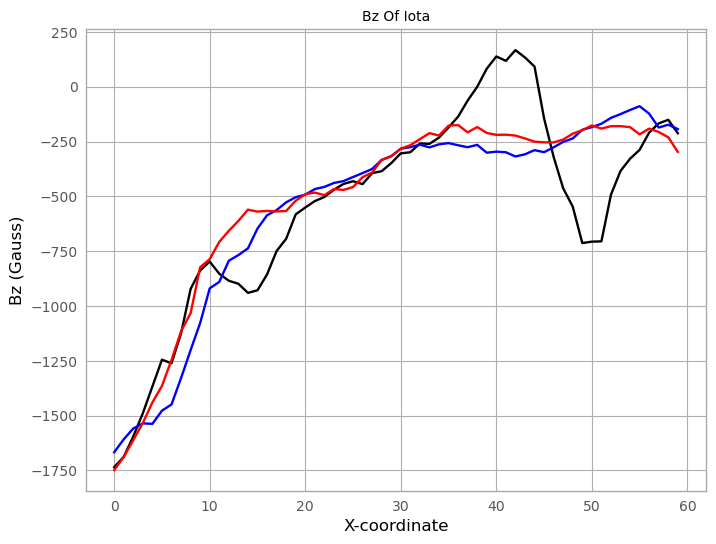

In [9]:
#vertical index [5]
bz_y0 = np.array([-1.73514412e+03, -1.68802962e+03, -1.59482281e+03, -1.48896884e+03,
       -1.36693154e+03, -1.24483927e+03, -1.26135826e+03, -1.12484826e+03,
       -9.22258230e+02, -8.37813160e+02, -7.97432821e+02, -8.53008016e+02,
       -8.85036989e+02, -8.98542695e+02, -9.40159511e+02, -9.28279306e+02,
       -8.56309266e+02, -7.49453977e+02, -6.93433573e+02, -5.82105845e+02,
       -5.50927508e+02, -5.21589459e+02, -5.02888063e+02, -4.69735683e+02,
       -4.43431503e+02, -4.30946686e+02, -4.44081143e+02, -3.94267370e+02,
       -3.85062723e+02, -3.48344977e+02, -3.03809325e+02, -2.98866501e+02,
       -2.58884575e+02, -2.60590807e+02, -2.32034374e+02, -1.85692902e+02,
       -1.36396451e+02, -6.30399935e+01, -1.48358207e-01,  8.24240471e+01,
        1.38160992e+02,  1.17976082e+02,  1.67052659e+02,  1.33414176e+02,
        9.20543914e+01, -1.44653976e+02, -3.20086607e+02, -4.63389743e+02,
       -5.46762088e+02, -7.13081535e+02, -7.06490058e+02, -7.05158211e+02,
       -4.92439850e+02, -3.84106118e+02, -3.28384453e+02, -2.87758516e+02,
       -2.08819761e+02, -1.67250862e+02, -1.50841350e+02, -2.12336825e+02])
bz_x0 = range(0,60)

#vertical index [5]
bz_y1 = np.array([-1667.19233401, -1607.78857129, -1558.57672983, -1535.45432083,
       -1537.47657387, -1477.31263529, -1449.04693336, -1328.50327953,
       -1201.22763405, -1077.13534596,  -919.3714319 ,  -890.1202833 ,
        -793.4467427 ,  -767.84908006,  -737.22192205,  -646.79395431,
        -586.38282155,  -562.52407912,  -527.30276879,  -503.66334656,
        -492.2894683 ,  -466.7394671 ,  -456.77045891,  -438.85534934,
        -430.38333158,  -411.78312108,  -393.83361006,  -375.07202595,
        -333.72611073,  -316.16917505,  -282.80045018,  -275.2558031 ,
        -264.35099219,  -276.58074156,  -262.68774266,  -257.07697479,
        -266.91500459,  -275.75953951,  -265.12178185,  -300.86413297,
        -296.08182218,  -298.82044976,  -318.13632137,  -308.05504112,
        -289.24327038,  -298.44545549,  -276.15665964,  -251.44997432,
        -235.93123087,  -196.55065366,  -184.19504484,  -168.75630106,
        -142.05555317,  -124.85164176,  -105.98019225,   -88.71870154,
        -122.90981028,  -186.11056893,  -173.07403342,  -193.25214947])
bz_x1 = range(0,60)

#vertical index [4]
bz_y2 = np.array([-1748.52034488, -1688.69916504, -1611.53176026, -1533.24265316,
       -1439.80775083, -1364.53779095, -1246.33758451, -1115.23425764,
       -1032.8676932 ,  -823.11199207,  -786.22419489,  -707.62900649,
        -657.12839904,  -611.82541255,  -560.7051809 ,  -569.40582736,
        -566.28943207,  -568.83847767,  -566.57916173,  -519.89514667,
        -490.03524947,  -482.81385306,  -494.31280816,  -466.66191794,
        -470.63365751,  -457.45142619,  -412.36230708,  -391.53221046,
        -333.88758023,  -318.06858646,  -282.26746599,  -266.60005469,
        -238.91558943,  -211.71858149,  -222.56717788,  -177.55430154,
        -174.61115515,  -208.0985431 ,  -183.89769138,  -210.77838953,
        -219.52256981,  -218.66753918,  -222.58466862,  -235.90646843,
        -250.66406619,  -253.53172218,  -253.91589455,  -240.78962808,
        -213.90493267,  -198.0548866 ,  -176.54590343,  -190.78535561,
        -179.96636543,  -179.74194306,  -184.2619484 ,  -217.08006244,
        -191.08278277,  -206.47833488,  -230.5702833 ,  -297.19309488])
bz_x2 = range(0,60)

#vertical index [5]
#mi_y3 = np.array([119.14689188, 118.29816508, 117.22296576, 116.71187611,
       #117.02160779, 116.86452767, 117.56237759, 117.39764581,
       #117.29722111, 117.83205595, 117.04586518, 116.91051429,
       #116.92873191, 118.00454868, 114.80412309, 114.58270999,
       #113.57670031, 112.66666475, 113.39828876, 112.8217511 ,
       #111.54356079, 113.23656908, 114.28132388, 115.54593513,
       #116.9943081 ])
#mi_x3 = range(45,70)

plt.title("Bz Of Iota")
plt.xlabel("X-coordinate")
plt.ylabel("Bz (Gauss)")
plt.plot(bz_x0,bz_y0, color="black")
plt.plot(bz_x1,bz_y1, color="blue")
plt.plot(bz_x2,bz_y2, color="red")
#plt.plot(mi_x3,mi_y3, color="pink")

plt.show()